Our goal: To find the eigenvalues for a given potential
How are we going to do it??
1. Graph out the potential

2. Create code that can find the intersection points between any given E and V(x), using the bisection method.

3. Using equation (4), we create code that can plot a graph of $\psi$(x), from left to right and right to left.

4. Using the equation (5), since we have values for $\psi$(x)


But before all that, let us initalise our constants and call libraries

Step 1: We graph out the potential

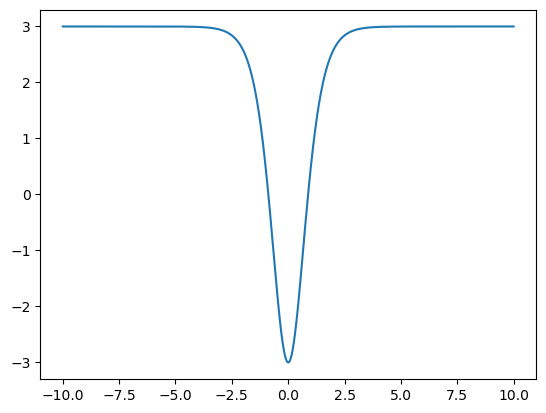

Step 2: Root findiing method for values of E and V(x), using a test value of E which is a known eigenvalue

[1.91408424]
[-1.91408424]


Step 3: The Numerov method.
We iterate the equation until we reach one of the turning points of the equation. Since we are interested in the values near one of the turning points, we shall iterate psi left and psi right until both reach the 2nd turning point.

<function matplotlib.pyplot.show(close=None, block=None)>

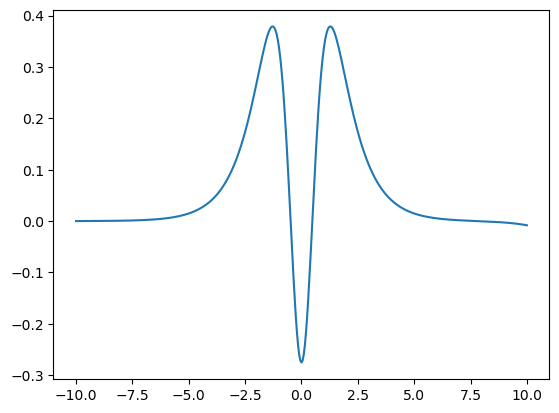

Step 4. Implementing the equation F(E)